In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
df = pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['ClassLabel', 'Alcohol', 'MalicAcid']

* The ``pd.read_csv()`` function is a Pandas function that is used to read CSV files into DataFrames.
* The ``header=None`` parameter tells Pandas to ignore the first row of the CSV file. This is useful if the first row of the CSV file does not contain column names.
* The ``usecols=[0,1,2]`` parameter tells Pandas to only read the first three columns of the CSV file. This is useful if you only need to use a subset of the columns in the CSV file.
* The ``DataFrame`` is a Pandas data structure that is used to store tabular data. It is similar to a spreadsheet.
* The ``columns`` attribute of a DataFrame is a list of the names of the columns in the DataFrame.
* The ``rename()`` method of a Series or DataFrame is used to rename the columns or index labels.

In [12]:
df

,ClassLabel,Alcohol,MalicAcid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


# Data Visualization 

## Kdeplot is a visualization technique used to estimate and plot the probability density function (PDF) of a data set

<Axes: xlabel='Alcohol', ylabel='Density'>

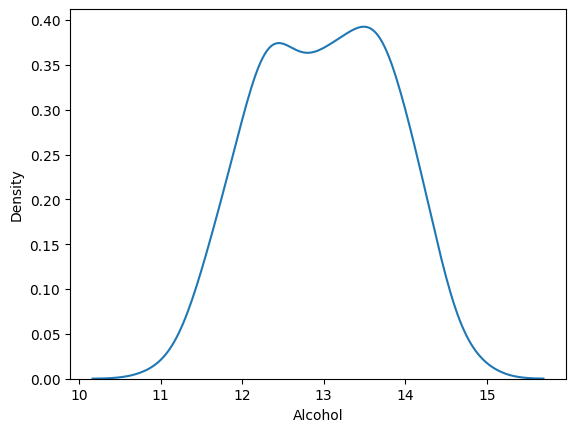

In [13]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='MalicAcid', ylabel='Density'>

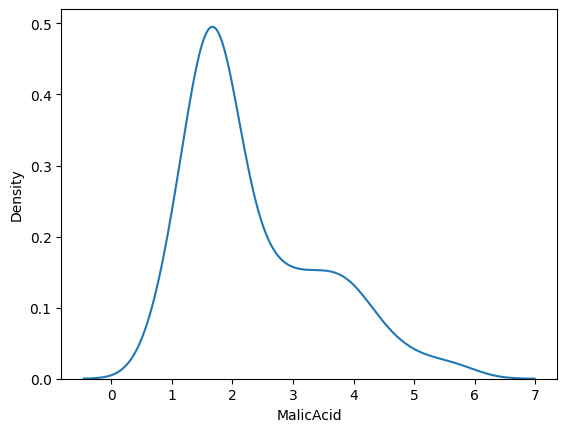

In [14]:
sns.kdeplot(df['MalicAcid'])

<Axes: xlabel='Alcohol', ylabel='MalicAcid'>

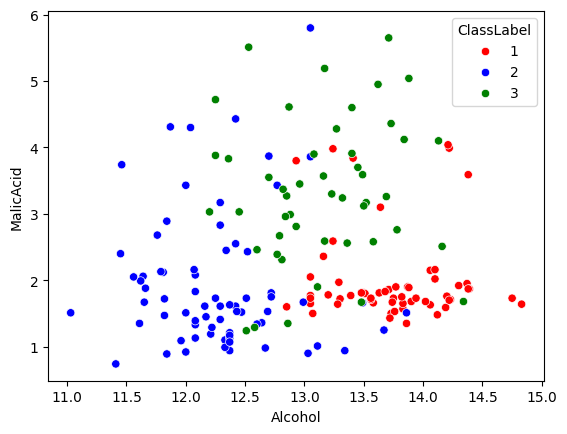

In [16]:
color_dist={1:'red',3:'green',2:'blue'}
sns.scatterplot(x=df['Alcohol'], y=df['MalicAcid'], hue = df['ClassLabel'], palette=color_dist)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df.drop('ClassLabel',axis=1),
                                                 df['ClassLabel'],test_size=0.3, random_state=0)

In [20]:
X_train.shape,X_test.shape

((124, 2), (54, 2))

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#fit the scaler to the train set, it will learn the parameters 
scaler.fit(X_train)

#transform train and test sets 
X_train_Scaled = scaler.transform(X_train)
X_test_Scaled = scaler.transform(X_test)


In [19]:
X_train_Scaled = pd.DataFrame(X_train_Scaled, columns= X_train.columns)
X_test_scaled = pd.DataFrame(X_test_Scaled, columns=X_test.columns)

In [21]:
np.round(X_train.describe(),1)

,Alcohol,MalicAcid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [23]:
np.round(X_train_Scaled.describe(),1)

,Alcohol,MalicAcid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


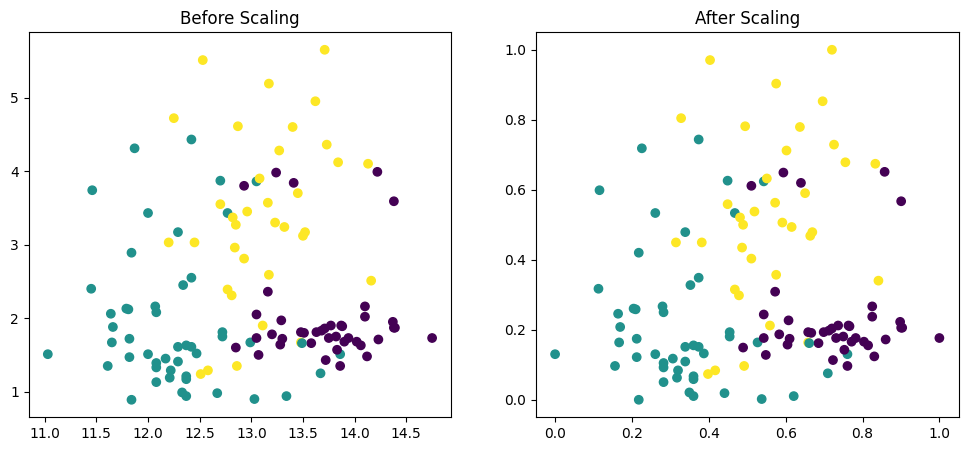

In [27]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'],X_train['MalicAcid'],c=Y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_Scaled['Alcohol'],X_train_Scaled['MalicAcid'],c=Y_train)
ax2.set_title("After Scaling")
plt.show()

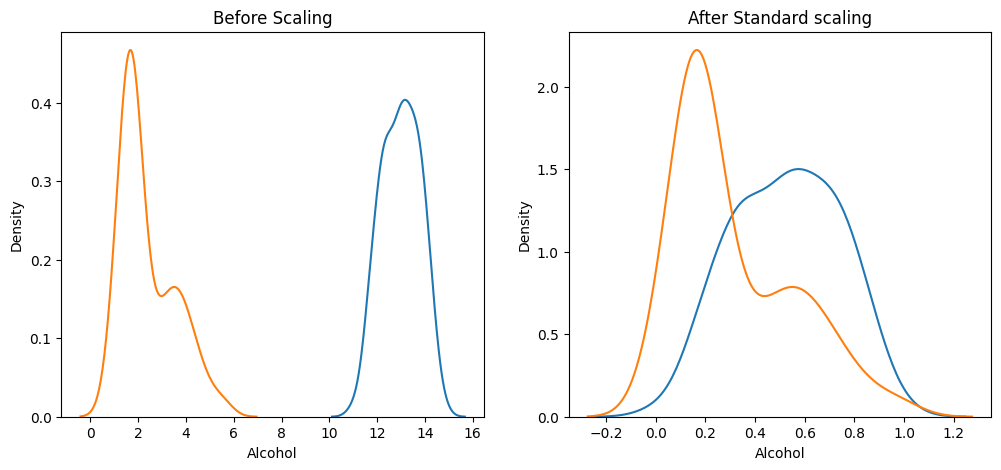

In [30]:
fig, (ax1,ax2) = plt.subplots(ncols= 2, figsize=(12,5))
#Before Scaling 
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['MalicAcid'], ax=ax1)

#After Scaling 
ax2.set_title("After Standard scaling")
sns.kdeplot(X_train_Scaled['Alcohol'], ax= ax2)
sns.kdeplot(X_train_Scaled['MalicAcid'], ax=ax2)

plt.show()